# ДЗ №1 СУНЦ МГУ - Numpy practice

_Задачи позаимствованы из курса ML ФКН ПМИ где они были позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_

### Туториальные задачи
__(9 баллов)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.5 балла__, векторизованная – в __1 балл__.

Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные &mdash; в файл functions_vectorized.py

Для каждой задачи, приведённой ниже сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

//anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


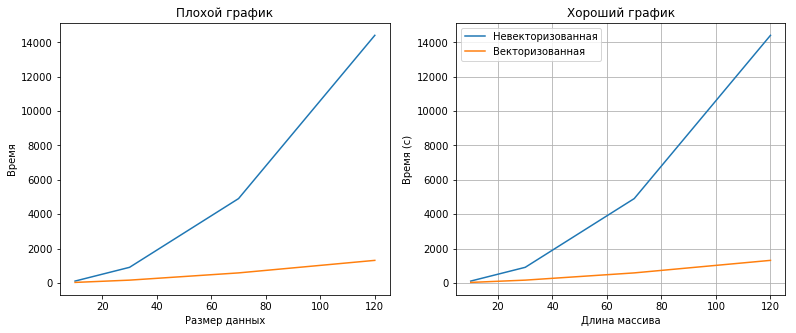

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

data_size = np.array([10, 30, 70, 120])
time_non_vectorized = data_size ** 2 + 10
time_vectorized = data_size ** 1.5

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.plot(data_size, time_non_vectorized)
ax1.plot(data_size, time_vectorized)
ax1.set_title(u"Плохой график")
ax1.set_xlabel(u"Размер данных")
ax1.set_ylabel(u"Время")

ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.

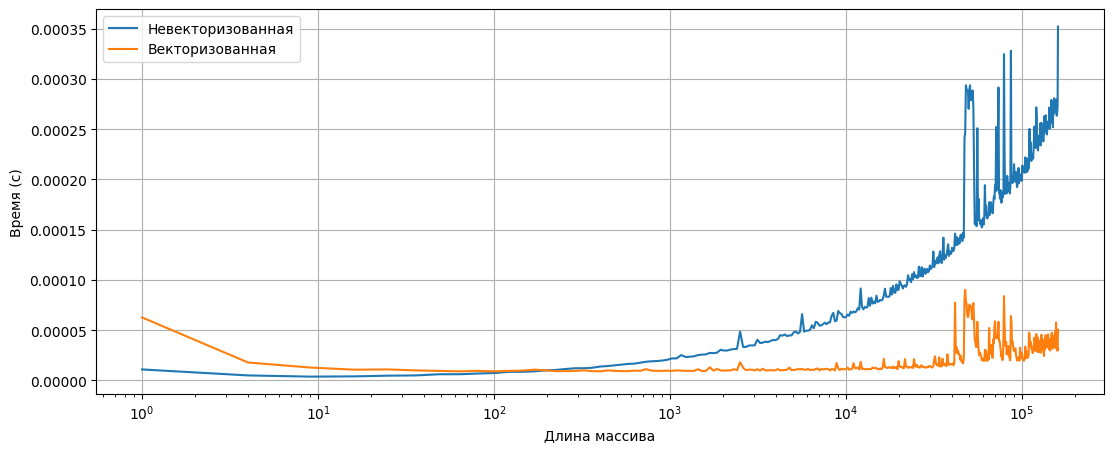

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time

%matplotlib inline

import numpy as np

matrices = []

data_size=[]
time_non_vectorized=[]
time_vectorized=[]
fl=0
for i in range(1, 401):
    matrix = np.random.randn(i, i)
    data_size.append(i*i)
    def sol1() :
      res1=1;
      for j in range(0,i):
        if(matrix[j][j]!=0):
          res1*=matrix[j][j]
      return res1
    def sol2():
      diagonal = np.diag(matrix)
      non_zero_diagonal = diagonal[diagonal != 0]
      product = np.prod(non_zero_diagonal)
      return product

    st1=time.time()
    sol1()
    en1=time.time()
    sol2()
    en2=time.time()
    time_vectorized.append(en2-en1)
    time_non_vectorized.append(en1-st1)


f, (ax2) = plt.subplots(1, figsize=(13, 5))
ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_xscale("log", base=10)
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()




* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  


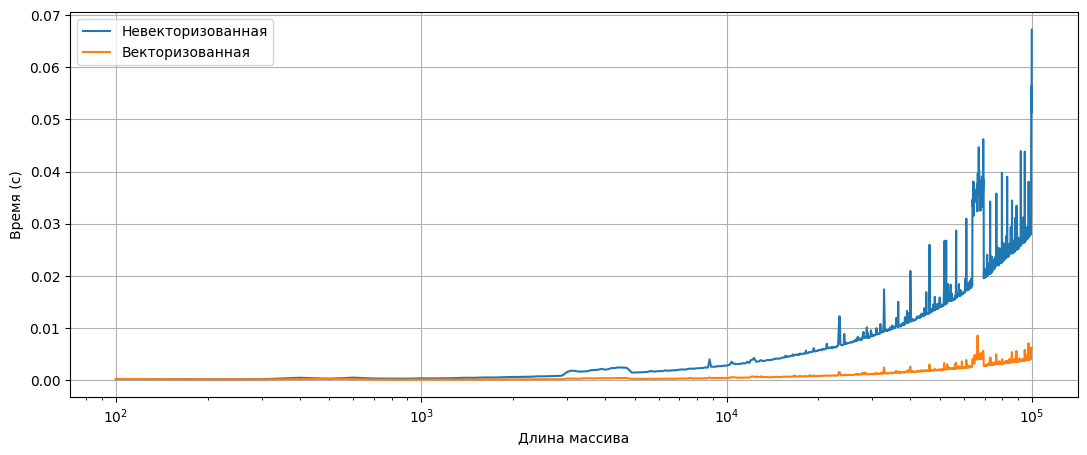

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time

%matplotlib inline

import numpy as np


data_size=[]
time_non_vectorized=[]
time_vectorized=[]
for i in range(100,100000,100):
    v1 = np.random.randn(i)
    v2 = np.random.randn(i)
    data_size.append(i)
    def sol1() :
      vs1=np.sort(v1)
      vs2=np.sort(v2)
      fl=0
      for j in range(0,i):
        if(vs1[j]!=vs2[j]):
          fl=1
      if(fl==0):
        return True
      else:
        return False
    def sol2():
      vs1=np.sort(v1)
      vs2=np.sort(v2)
      return np.allclose(vs1, vs2)
    st1=time.time()
    sol1()
    en1=time.time()
    sol2()
    en2=time.time()
    time_vectorized.append(en2-en1)
    time_non_vectorized.append(en1-st1)
f, (ax2) = plt.subplots(1, figsize=(13, 5))
ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_xscale("log", base=10)
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()

* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.

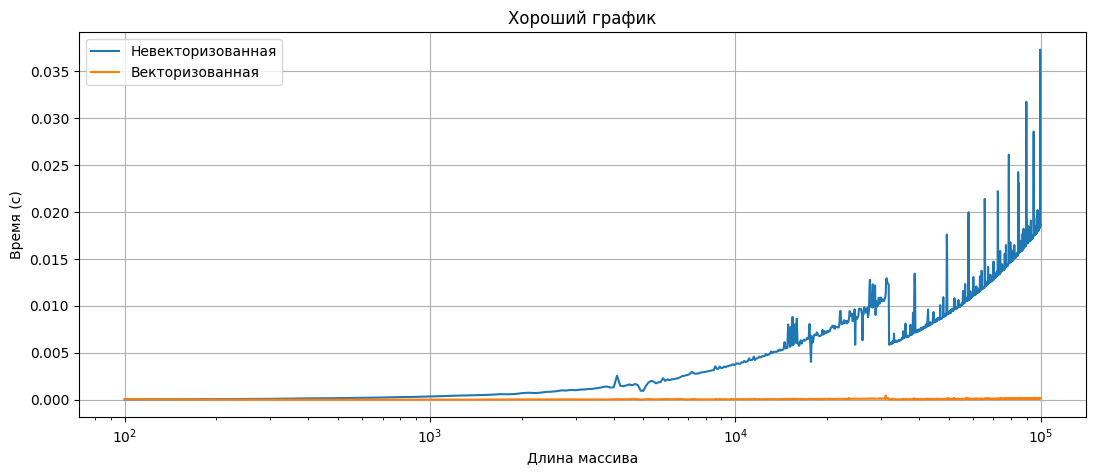

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time

%matplotlib inline

import numpy as np

matrices = []

data_size=[]
time_non_vectorized=[]
time_vectorized=[]
for i in range(100,100000,100):
    x = np.random.randn(i)
    data_size.append(i)
    def sol1() :
      res=0
      for j in range(1,i):
        if(x[j-1]==0):
          res=max(res,x[j])
      return res
    def sol2():
      zero_indices = np.where(x == 0)[0]
      after_zero_indices = zero_indices[zero_indices < len(x) - 1] + 1
      after_zero_values = x[after_zero_indices]
      if len(after_zero_values) > 0:
         max_value = np.max(after_zero_values)
         return max_value
    st1=time.time()
    sol1()
    en1=time.time()
    sol2()
    en2=time.time()
    time_vectorized.append(en2-en1)
    time_non_vectorized.append(en1-st1)
f, (ax2) = plt.subplots(1, figsize=(13, 5))
ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xscale("log", base=10)
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()



* __ Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).


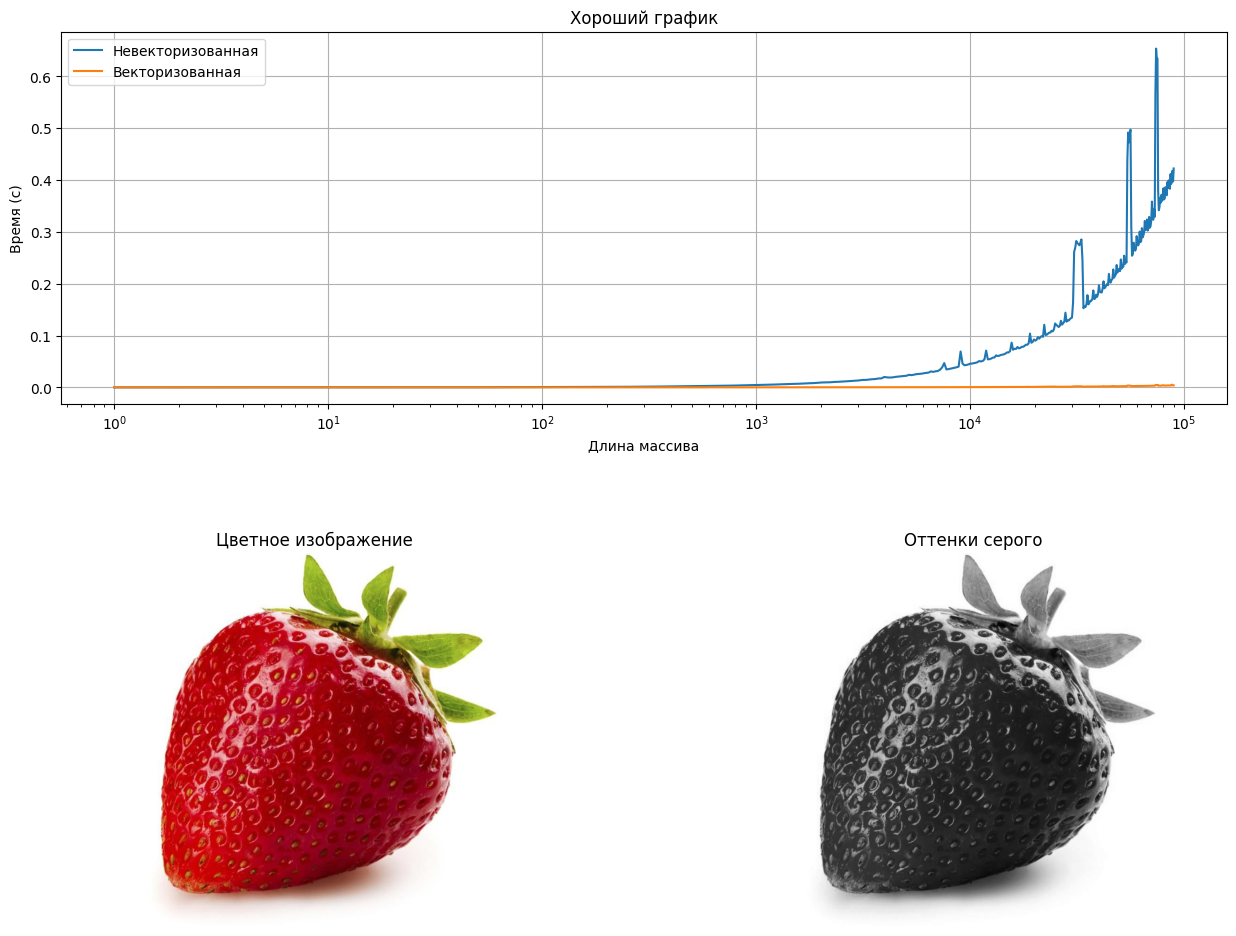

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy import misc
from PIL import Image

%matplotlib inline

import numpy as np

data_size=[]
time_non_vectorized=[]
time_vectorized=[]
for i in range(1,300):
    x =  np.random.randint(0, 256, (i, i,3))
    www=np.random.uniform(0, 1, 3)
    data_size.append(i*i)
    result = np.zeros((i,i))
    def sol1() :
      for j in range(0,i):
        for e in range(0,i):
          sum=0
          for l in range(0,3):
            x[j][e][l]*=www[l]
            sum+=x[j][e][l]
          result[j][j]=sum
      return result

    def sol2():
      image_array = np.array(x)
      gray_image = np.sum(image_array*weights, axis=2)
      return gray_image
    st1=time.time()
    sol1()
    en1=time.time()
    sol2()
    en2=time.time()
    time_vectorized.append(en2-en1)
    time_non_vectorized.append(en1-st1)

fig = plt.figure(figsize=(13, 10))

ax1 = plt.subplot(2, 1, 1)
ax1.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax1.plot(data_size, time_vectorized, label=u"Векторизованная")
ax1.set_title(u"Хороший график")
ax1.set_xscale("log", base=10)
ax1.set_xlabel(u"Длина массива")
ax1.set_ylabel(u"Время (с)")
ax1.grid()
ax1.legend()

ax2 = plt.subplot(2, 2, 3)
ax2.imshow(image)
ax2.set_title('Цветное изображение')
ax2.axis('off')

ax3 = plt.subplot(2, 2, 4)
ax3.imshow(gray_image, cmap='gray')
ax3.set_title('Оттенки серого')
ax3.axis('off')

plt.tight_layout(pad=3.0)
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).

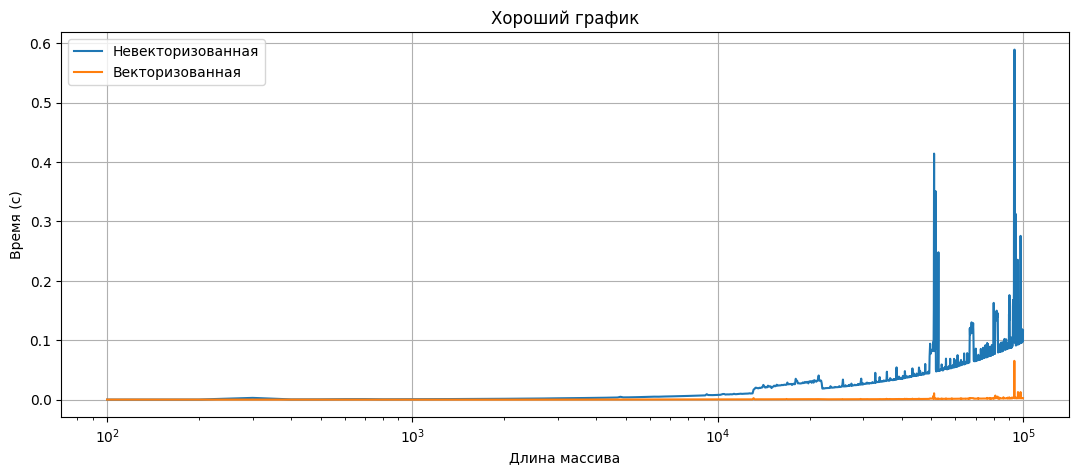

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time

%matplotlib inline

import numpy as np

matrices = []

data_size=[]
time_non_vectorized=[]
time_vectorized=[]
for i in range(100,100000,100):
    x = np.random.randn(i)
    vxx=list(x)
    data_size.append(i)
    def sol1() :
      vx=sorted(vxx)
      y=([])
      z=([])
      lastval=10**20
      for j in range(0,i):
        if(x[j]!=lastval):
          y.append(x[j])
          z.append(1)
        else:
          z[len(z)-1]+=1
      tuple_of_vectors = (y, z)
      return tuple_of_vectors

    def sol2():
      vx=np.sort(x)
      change_indices = np.where(x[:-1] != x[1:])[0] + 1
      starts = np.concatenate(([0], change_indices))
      ends = np.concatenate((change_indices, [len(x)]))
      values = x[starts]
      counts = ends - starts
      tuple_of_vectors = (values, counts)
      return tuple_of_vectors
    st1=time.time()
    sol1()
    en1=time.time()
    sol2()
    en2=time.time()
    time_vectorized.append(en2-en1)
    time_non_vectorized.append(en1-st1)
f, (ax2) = plt.subplots(1, figsize=(13, 5))
ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xscale("log", base=10)
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()



* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Дополнительно сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

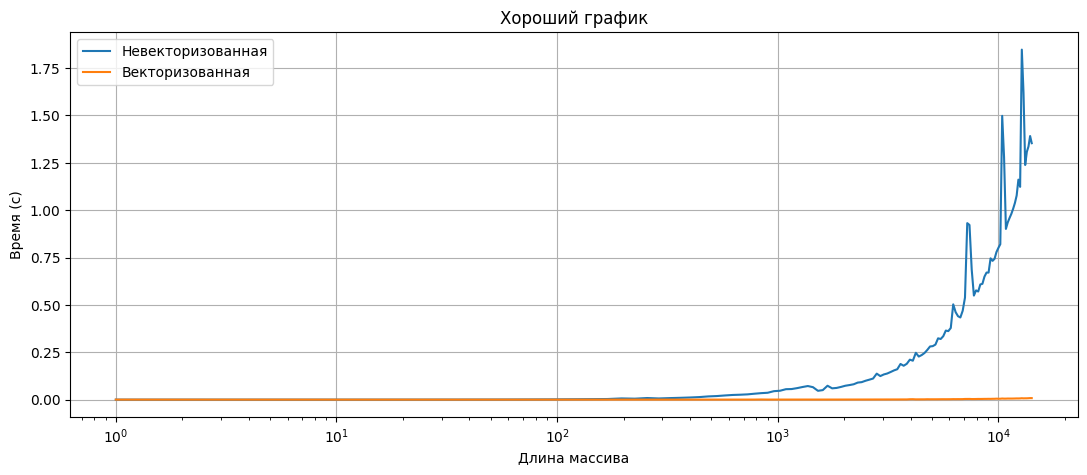

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time
import math

%matplotlib inline

import numpy as np

matrices = []

data_size=[]
time_non_vectorized=[]
time_vectorized=[]
for i in range(1,120):
    x=np.random.randn(i,i)
    y=np.random.randn(i,i)
    data_size.append(i*i)
    def sol1() :
      n = x.shape[0]
      m = y.shape[0]
      dist_matrix = np.zeros((n, m))
      for j in range(n):
          for e in range(m):
              sum=0
              for l in range(i):
                sum+=((x[j][l] - y[e][l]) ** 2)
              sum=math.sqrt(sum)
              dist_matrix[j, e] = sum
      return dist_matrix
    def sol2():
      diff = x[:, np.newaxis, :] - y[np.newaxis, :, :]
      squared_dist = np.sum(diff ** 2, axis=2)
      dist_matrix = np.sqrt(squared_dist)

      return dist_matrix
    st1=time.time()
    sol1()
    en1=time.time()
    sol2()
    en2=time.time()
    time_vectorized.append(en2-en1)
    time_non_vectorized.append(en1-st1)
f, (ax2) = plt.subplots(1, figsize=(13, 5))
ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xscale("log", base=10)
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()

### Туториал по Markdown

__(1 балл)__

Напишите краткий (а в данной домашке ещё и почти бесмысленный) отчёт с использованием 4-5 различных вариантов разметки/выделения текста.



*В этом домашнем задании* **я решил 5 задачи**    ***двумя способами:*** ~~векторзированным и невекторизированным.~~ <u>По графикам видно, что векторизированная реализация работает на больших значениях сильно бытсрее</u>